In [1]:
import Wavefront_Generation as WG
import Wavefront_Plotting as WP
import Wavefront_Misc as WM
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact, widgets
from enum import Enum
%matplotlib widget

In [2]:
interface = WG.Full_Cycle(L_time=3,C_time =7,L_impedance = 100,show_about=False, number_periods=1.5)

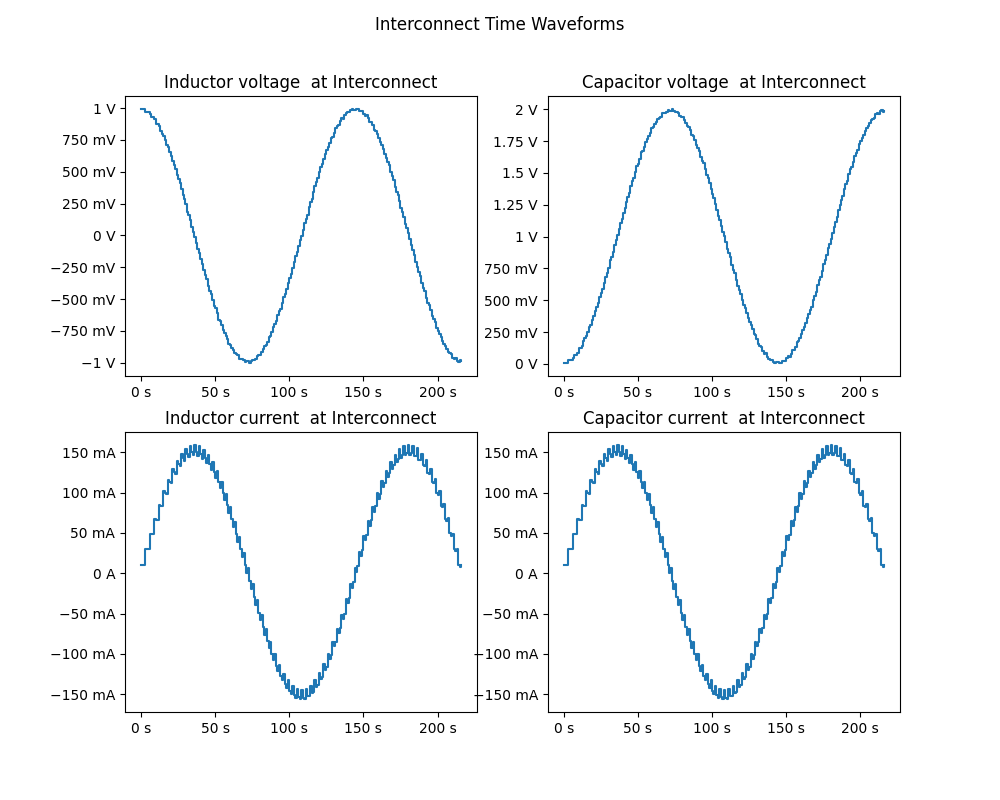

In [3]:
fig_interconnect_all,ax_interconnect_all = WP.make_time_interconnect_all(interface)

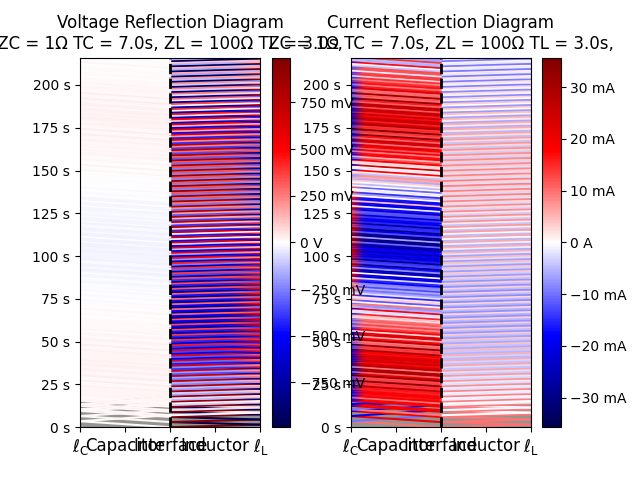

In [4]:
fig_ref, ax_ref = plt.subplots(1,2)

WP.plot_refelction_diagram(interface, ax_ref[0],True)
WP.plot_refelction_diagram(interface, ax_ref[1],False)

In [5]:
def interact_interconnect_time_and_fanout_path(is_Voltage:bool =True,padding =0):

    fig_path, ax_path = plt.subplot_mosaic([['INTER','INTER'],
                                            ['LF','CF']])
    
    if(is_Voltage):
        which_str_prefix = 'voltage '
        ax_voltage = ax_path['INTER']
        ax_current =False
    else:
        which_str_prefix = 'current '
        ax_voltage =False
        ax_current = ax_path['INTER']
        

    WP.plot_time_interconnect_and_intercepts_at_time(0,interface,ax_voltage=ax_voltage,ax_current=ax_current)
    WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['LF'],which_str_prefix+'inductor',padding=padding)
    WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['CF'],which_str_prefix+'capacitor',padding=padding)
    
    def remember_lims(axes):
        lims = []
        for ax in axes:
            lims.append((ax.get_xlim(),ax.get_ylim()))
            
        return lims
    
    def set_lims(axes,lims):
        for ax, lim in zip(axes,lims):
            ax.set_xlim(lim[0])
            ax.set_ylim(lim[1])

    def plot_path(t):
        
        lims = remember_lims(ax_path.values())
        WP.clear_subplot(ax_path.values())
        set_lims(ax_path.values(),lims)
        
        WP.plot_time_interconnect_and_intercepts_at_time(t,interface,ax_voltage=ax_voltage,ax_current=ax_current)
        WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['LF'],which_str_prefix+'inductor',show_colour_bar=False,padding=padding)
        WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['CF'],which_str_prefix+'capacitor',show_colour_bar=False,padding=padding)
        WP.plot_trace_on_merged_fanout_axis(interface,ax_path['LF'],t,show_cross=True,padding=padding)
        WP.plot_trace_on_merged_fanout_axis(interface,ax_path['CF'],t,show_cross=True,padding=padding)
        
    inter = interact(plot_path,t=widgets.FloatSlider(min=0, max=float(interface.data_input.Simulation_Stop_Time), step=0.1, value=0, layout=widgets.Layout(width='auto')))

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=215.94879206690…

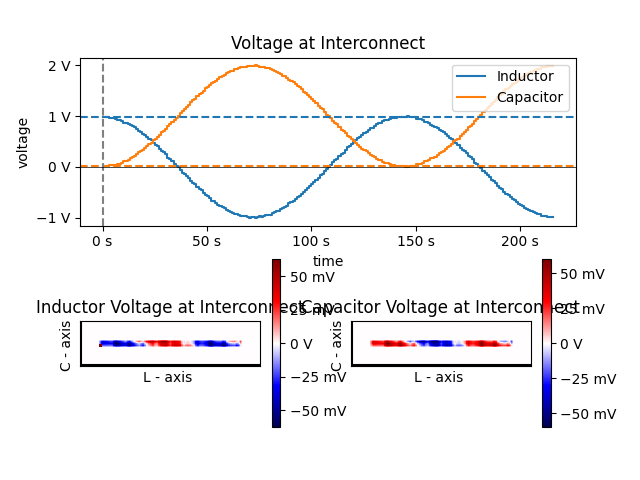

In [6]:
make_interconnect_time_and_fanout_path(True,10)

interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=215.94879206690…

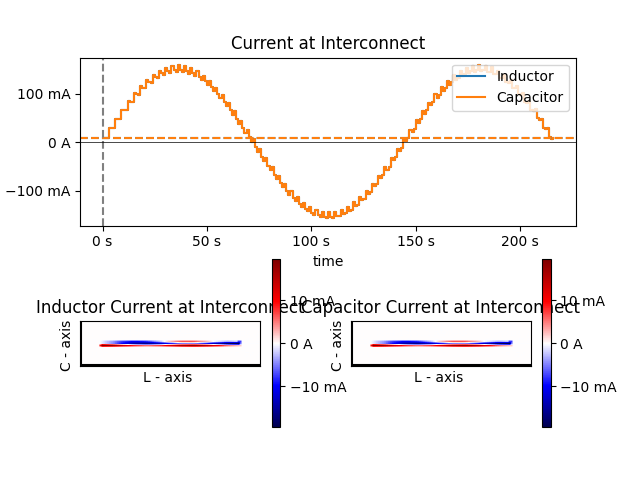

In [7]:
make_interconnect_time_and_fanout_path(False,10)

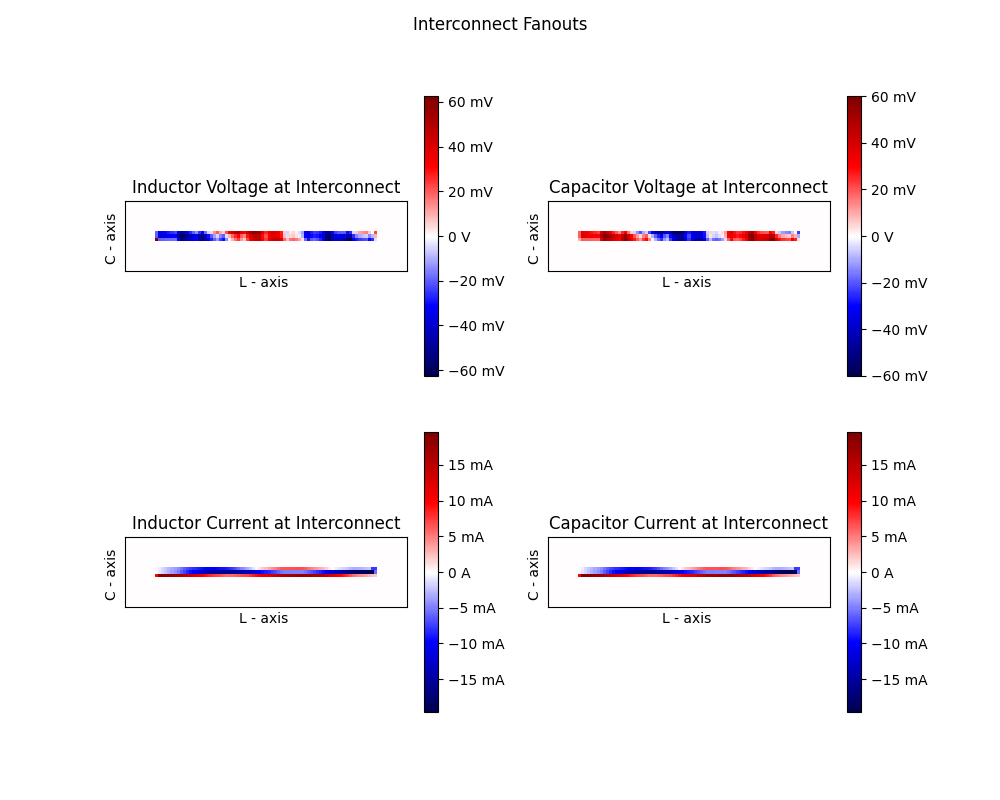

In [8]:
fig_int, ax_int = WP.make_fanout_interconnect_all(interface.data_output_multiplicative,padding=10)
# WP.plot_trace_on_merged_fanout_axis(interface,ax_int['VC'])

In [9]:
def plot_merging_lines_on_fanout(array: np.ndarray , KL :int, KC: int, ax,**kwargs):
    
    default_kwargs = {
        'transpose' : True,
        'padding' : 0,
        'line_colour' : 'k',
        'line_width' : 0.5
    }
    
    kwargs = WM.handle_default_kwargs(kwargs,default_kwargs)
    
    # get index limits of L and C axes 
    L_max, C_max = array.shape
    
    number_KL = math.floor(L_max/KL) +1
    number_KC = math.floor(C_max/KC) +1
    
    for i in range (number_KL):
        if(kwargs['transpose']): # L-axis is horizontal 
            line_position = i*KL - 0.5 + kwargs['padding']
            ax.axvline(x=line_position, linewidth=kwargs['line_width'],c=kwargs['line_colour'])
        else: 
            ax.axhline(y=line_position, linewidth=kwargs['line_width'],c=kwargs['line_colour'])
            
    for i in range (number_KC):
        if(kwargs['transpose']): # C-axis is vertical
            line_position = i*KC - 0.5 + kwargs['padding']
            ax.axhline(y=line_position, linewidth=kwargs['line_width'],c=kwargs['line_colour'])
        else: 
            ax.axvline(x=line_position, linewidth=kwargs['line_width'],c=kwargs['line_colour'])
    

In [18]:
def make_commutative_merged_lines(interface_data : WG.Data_Interface_Storage ,which_operation : str ,which_string : str,**kwargs):
    
    fig, ax = plt.subplots(1,3)
    allowed_operations = ['interconnect','sending','returning']
    
    if (which_operation.lower() == allowed_operations[0]):
        commutative_array = interface.data_output_commutative.get_interconnect_array(which_string)
        merged_array = interface.data_output_multiplicative.get_interconnect_array(which_string)
    elif(which_operation.lower() == allowed_operations[1]):
        commutative_array = interface.data_output_commutative.get_sending_wavefronts_magnitudes(which_string)
        merged_array = interface.data_output_multiplicative.get_sending_wavefronts_magnitudes(which_string)
    elif(which_operation.lower() == allowed_operations[3]):
        commutative_array = interface.data_output_commutative.get_returning_wavefronts_magnitudes(which_string)
        merged_array = interface.data_output_multiplicative.get_returning_wavefronts_magnitudes(which_string)
    else:
        raise ValueError(f'the provided which_operation paramters was incorrect, possible options are : {allowed_operations}')
        
    C_axis_merged_array = WG.transform_merged_array_to_C_axis(interface.data_input, merged_array)
    
    if (which_string.find('voltage') > 0 ):
        units = 'V'
    else:
        units = 'A'

    padding =10

    WP.plot_fanout_magnitude(commutative_array,ax[0], show_colour_bar = False, show_ticks = True)
    WP.plot_fanout_magnitude(merged_array,ax[1], padding=padding, show_colour_bar = False, show_ticks = True)
    WP.plot_fanout_magnitude(C_axis_merged_array,ax[2], units = units,padding=padding, show_ticks = True)

    ax[0].set_title(which_operation+' '+which_string)
    ax[1].set_title('Merged on L-axis')
    ax[2].set_title('Merged on C-axis')

    KL = interface.data_input.Inductor_LCM_Factor
    KC = interface.data_input.Capacitor_LCM_Factor

    plot_merging_lines_on_fanout(commutative_array,KL,KC,ax[0])
    plot_merging_lines_on_fanout(merged_array,KL,KC,ax[1],padding=padding)
    plot_merging_lines_on_fanout(C_axis_merged_array,KL,KC,ax[2],padding=padding)
    


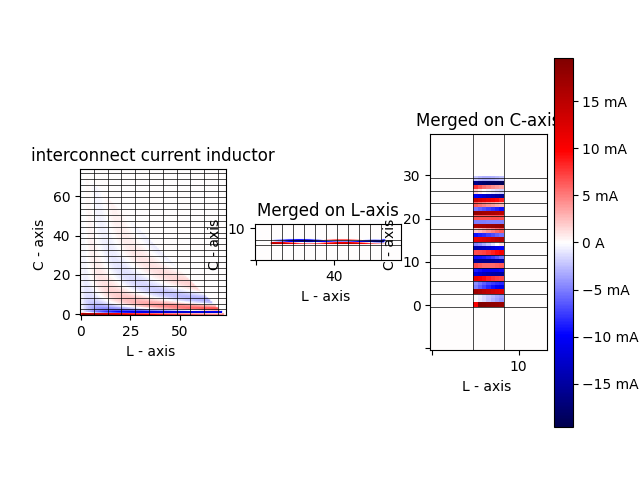

In [19]:
make_commutative_merged_lines(interface,'interconnect','current inductor')

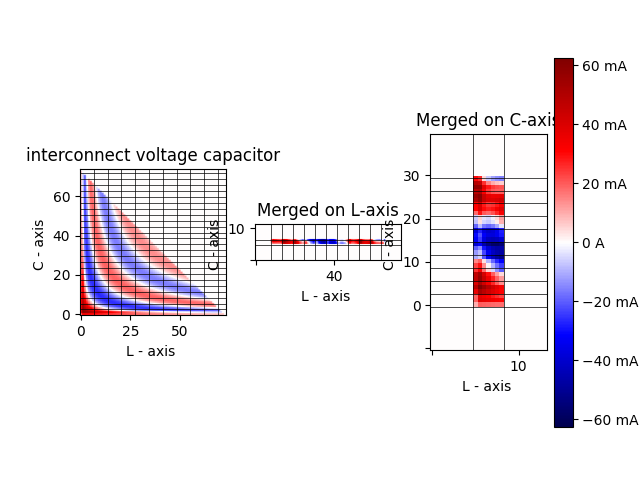

In [20]:
make_commutative_merged_lines(interface,'interconnect','voltage capacitor')

-2.004043125464603 2.004043125464603


interactive(children=(FloatSlider(value=0.0, description='t', layout=Layout(width='auto'), max=215.94879206690…

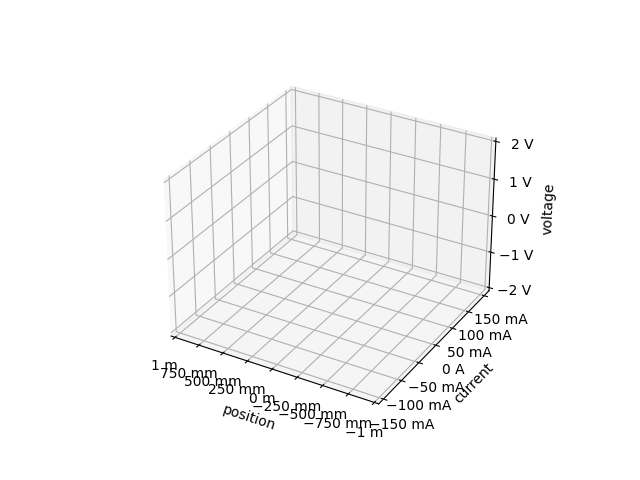

In [13]:
fig_3d = plt.figure()

ax_3d = fig_3d.add_subplot(111,projection='3d')


# ax_3d = fig_3d.add_subplot(131,projection='3d')
# ax_3d_v = fig_3d.add_subplot(132)
# ax_3d_i = fig_3d.add_subplot(133)


x_pos_lim_0 = float(interface.data_input.Capacitor_Length)
x_pos_lim_1 = -float(interface.data_input.Inductor_Length)

y_current_lim_1 = float(max(np.cumsum(interface.data_output_ordered.Current_Interconnect_Capacitor)))
y_current_lim_0 = float(min(np.cumsum(interface.data_output_ordered.Current_Interconnect_Capacitor)))

z_voltage_lim_1 = float(max(np.cumsum(interface.data_output_ordered.Voltage_Interconnect_Capacitor)))
# z_voltage_lim_1 = float(min(np.cumsum(interface.data_output_ordered.Voltage_Interconnect_Capacitor)))
z_voltage_lim_0 = -z_voltage_lim_1


print(z_voltage_lim_0,z_voltage_lim_1)

def interact_3D_func(t):
    ax_3d.clear()
    # ax_3d_v.clear()
    # ax_3d_i.clear()
    # WP.plot_time_interconnect_and_intercepts_at_time(t,interface,ax_voltage=ax_3d_v,ax_current=ax_3d_i)
    ax_3d.set_xlim(x_pos_lim_0,x_pos_lim_1)
    ax_3d.set_ylim(y_current_lim_0,y_current_lim_1)
    ax_3d.set_zlim(z_voltage_lim_0,z_voltage_lim_1)
    WP.make_3d_spatial(str(t),interface,ax_3d)
    
inter_2 = interact(interact_3D_func,t=widgets.FloatSlider(min=0, max=float(interface.data_input.Simulation_Stop_Time), step=0.1, value=0, layout=widgets.Layout(width='auto')))

In [14]:
interface_2 = WG.Full_Cycle(L_impedance=1, C_impedance = 500,L_time = 1, C_time=7, Simulation_stop_time = 200 , show_about = False)

(<Figure size 1000x800 with 4 Axes>,
 {'VL': <AxesSubplot:label='VL', title={'center':'Inductor voltage  at Interconnect'}>,
  'VC': <AxesSubplot:label='VC', title={'center':'Capacitor voltage  at Interconnect'}>,
  'IL': <AxesSubplot:label='IL', title={'center':'Inductor current  at Interconnect'}>,
  'IC': <AxesSubplot:label='IC', title={'center':'Capacitor current  at Interconnect'}>})

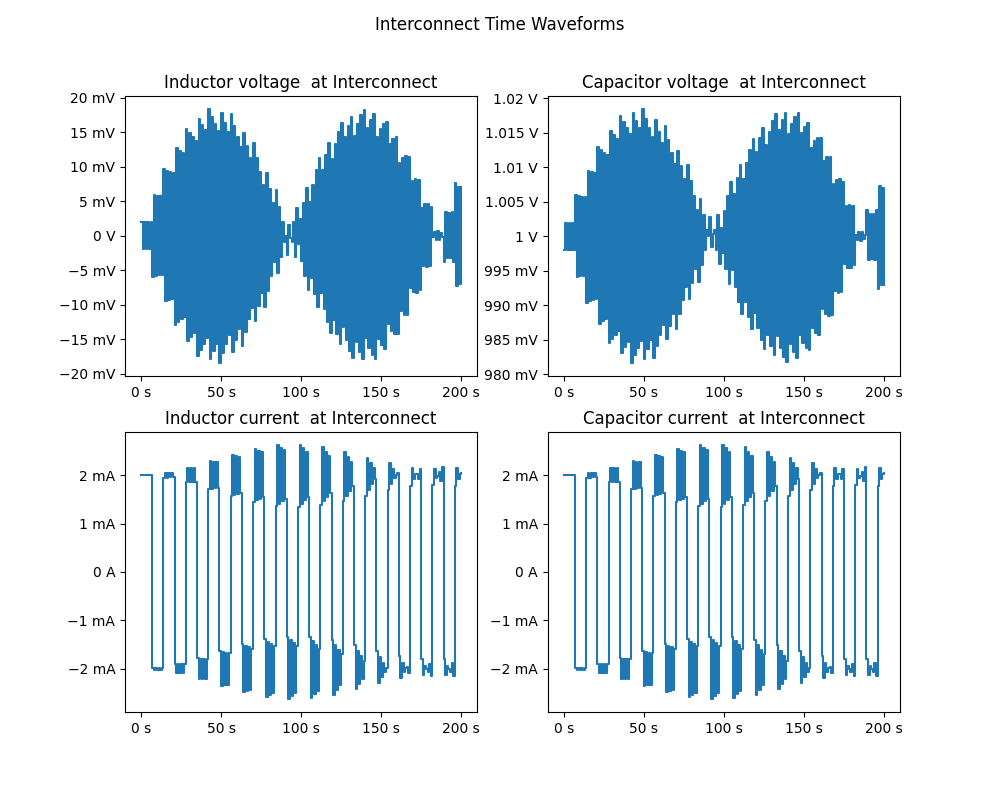

In [15]:
WP.make_time_interconnect_all(interface_2)

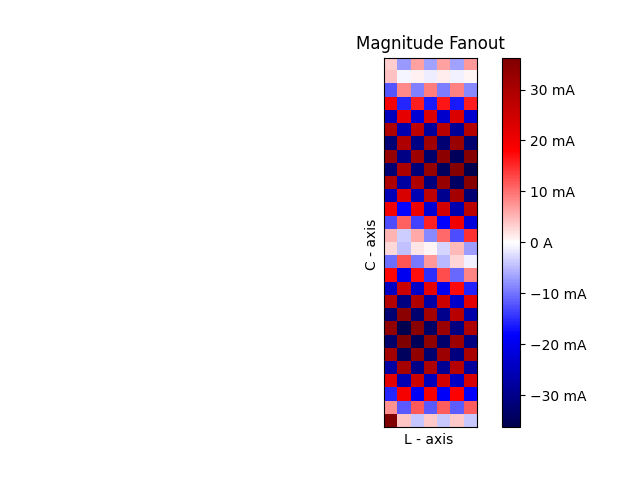

In [16]:
fig_wierd, ax_wierd = plt.subplots()
WP.plot_fanout_magnitude(WG.transform_merged_array_to_C_axis(interface_2.data_input,interface_2.data_output_multiplicative.Voltage_Interconnect_Capacitor),ax_wierd,contrast=True)

(<Figure size 1200x1000 with 4 Axes>,
 {'VR': <AxesSubplot:label='VR', title={'center':'Returning voltage wavefronts\n accumulated in Capacitor'}>,
  'IS': <AxesSubplot:label='IS', title={'center':'Sending current wavefronts\n accumulated in Capacitor'}>,
  'VS': <AxesSubplot:label='VS', title={'center':'Sending voltage wavefronts\n accumulated in Capacitor'}>,
  'IR': <AxesSubplot:label='IR', title={'center':'Returning current wavefronts\n accumulated in Capacitor'}>})

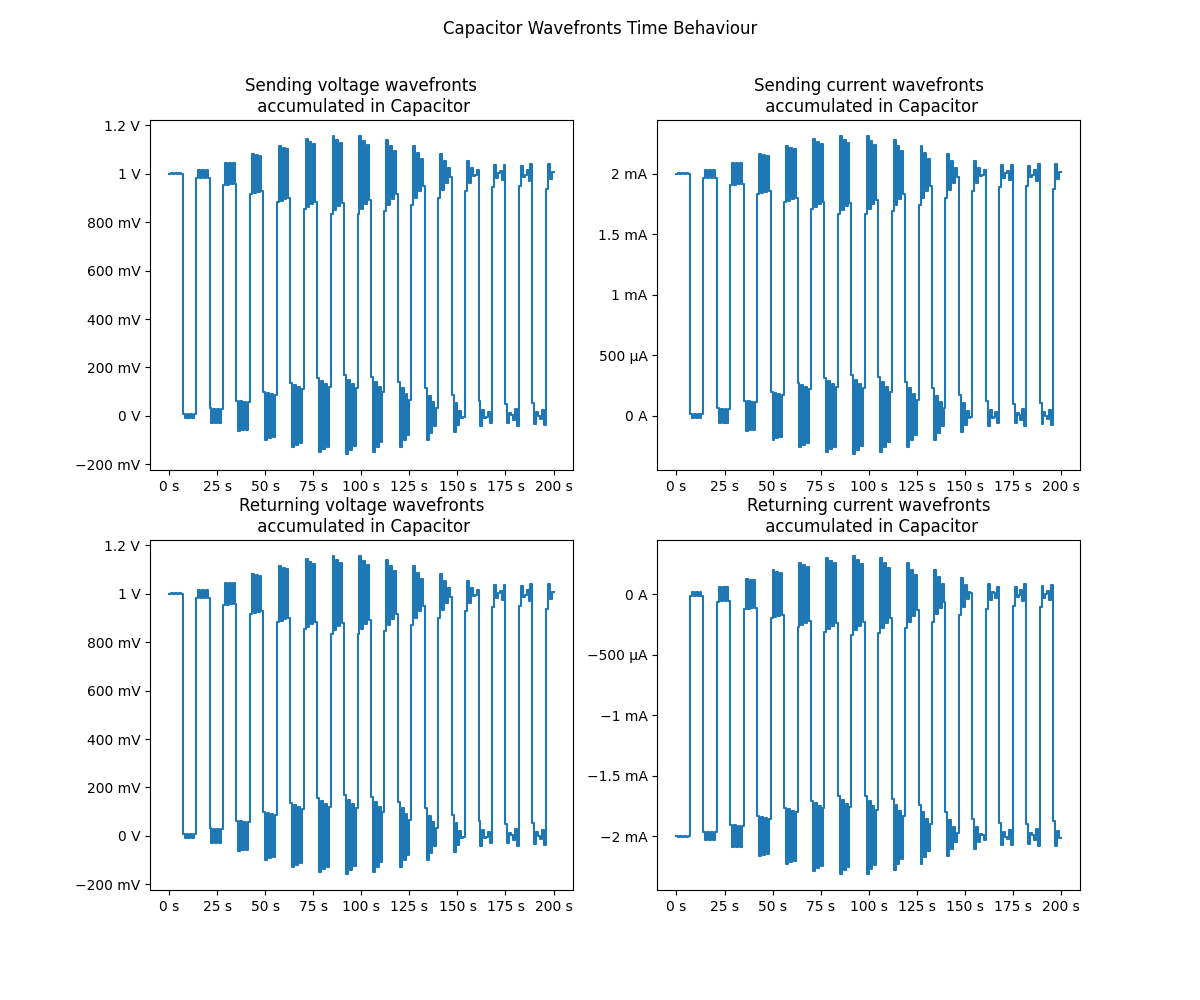

In [17]:
WP.make_time_wavefronts_all(interface_2,False)